In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

In [2]:
#forming a panda dataframe from the metadata file

file_handler = open("UrbanSound8K.csv", "r")
data = pd.read_csv(file_handler, sep = ',')
file_handler.close()


In [3]:
#head of the dataframe
data.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [4]:
#count of datapoints in each of the folders
data["fold"].value_counts()

4     990
5     936
3     925
2     888
1     873
7     838
10    837
6     823
9     816
8     806
Name: fold, dtype: int64

In [5]:
from librosa import display
import librosa

In [6]:
#feature set
#This file is of a dog bark
y,sr=librosa.load("archive/fold5/100032-3-0-0.wav")
mfccs = librosa.feature.mfcc(y, sr, n_mfcc=40)
melspectrogram =librosa.feature.melspectrogram(y=y, sr=sr, n_mels=40,fmax=8000)
chroma_stft=librosa.feature.chroma_stft(y=y, sr=sr,n_chroma=40)

chroma_cq =librosa.feature.chroma_cqt(y=y, sr=sr,bins_per_octave=40,n_chroma=40)
chroma_cens =librosa.feature.chroma_cens(y=y, sr=sr,bins_per_octave=40,n_chroma=40)
melspectrogram.shape,chroma_stft.shape,chroma_cq.shape,chroma_cens.shape,mfccs.shape

C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=876
  n_fft, y.shape[-1]
C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=438
  n_fft, y.shape[-1]
C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=219
  n_fft, y.shape[-1]
C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=110
  n_fft, y.shape[-1]


((40, 14), (40, 14), (40, 14), (40, 14), (40, 14))

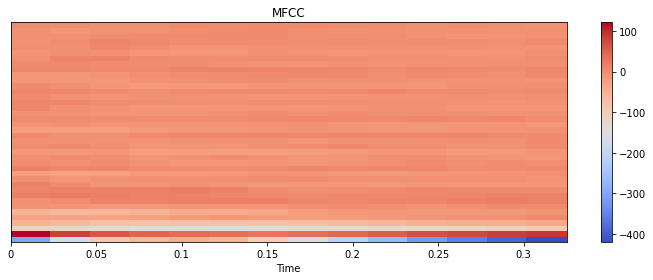

In [7]:
#MFCC of dog bark
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()

C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


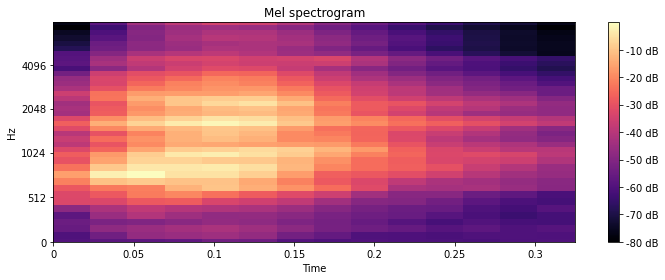

In [8]:
#Melspectrogram of a dog bark
plt.figure(figsize=(10,4))
librosa.display.specshow(librosa.power_to_db(melspectrogram,ref=np.max),y_axis='mel', fmax=8000,x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

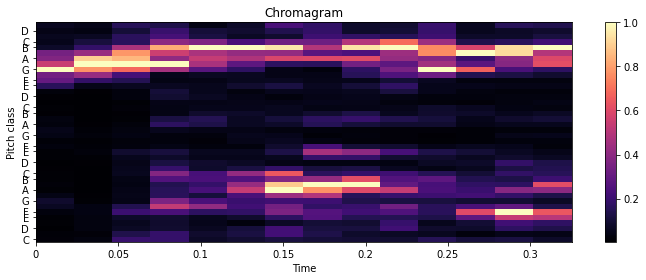

In [9]:
#Chromagram of dog bark
plt.figure(figsize=(10,4))
librosa.display.specshow(chroma_stft, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()

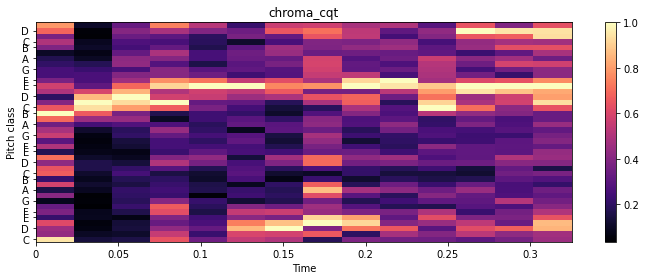

In [10]:
#Chroma cqt of a dog bark
plt.figure(figsize=(10,4))
librosa.display.specshow(chroma_cq, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('chroma_cqt')
plt.tight_layout()

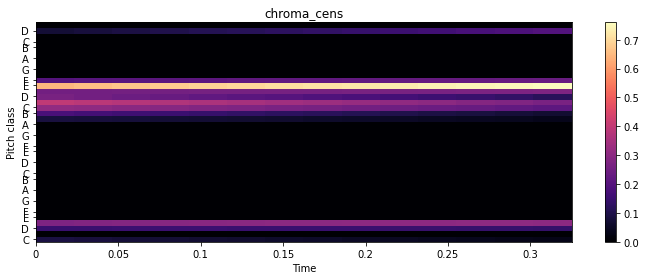

In [11]:
#Chroma cens of a dog bark
plt.figure(figsize=(10,4))
librosa.display.specshow(chroma_cens, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('chroma_cens')
plt.tight_layout()

In [12]:
#feature set
y,sr=librosa.load("archive/fold5/100263-2-0-137.wav")
mfccs = np.mean(librosa.feature.mfcc(y, sr, n_mfcc=40).T,axis=0)
melspectrogram = np.mean(librosa.feature.melspectrogram(y=y, sr=sr, n_mels=40,fmax=8000).T,axis=0)
chroma_stft=np.mean(librosa.feature.chroma_stft(y=y, sr=sr,n_chroma=40).T,axis=0)
chroma_cq = np.mean(librosa.feature.chroma_cqt(y=y, sr=sr,bins_per_octave=40,n_chroma=40).T,axis=0)
chroma_cens = np.mean(librosa.feature.chroma_cens(y=y, sr=sr,bins_per_octave=40,n_chroma=40).T,axis=0)
melspectrogram.shape,chroma_stft.shape,chroma_cq.shape,chroma_cens.shape,mfccs.shape

((40,), (40,), (40,), (40,), (40,))

In [13]:
#stacking and reshaping
features=np.reshape(np.vstack((mfccs,melspectrogram,chroma_stft,chroma_cq,chroma_cens)),(40,5))
features.shape

(40, 5)

In [14]:
#preprocessing using entire feature set
x_train=[]
x_test=[]
y_train=[]
y_test=[]
path="archive/fold"
for i in tqdm(range(len(data))):
    fold_no=str(data.iloc[i]["fold"])
    file=data.iloc[i]["slice_file_name"]
    label=data.iloc[i]["classID"]
    filename=path+fold_no+"/"+file
    y,sr=librosa.load(filename)
    mfccs = np.mean(librosa.feature.mfcc(y, sr, n_mfcc=40).T,axis=0)
    melspectrogram = np.mean(librosa.feature.melspectrogram(y=y, sr=sr, n_mels=40,fmax=8000).T,axis=0)
    chroma_stft=np.mean(librosa.feature.chroma_stft(y=y, sr=sr,n_chroma=40).T,axis=0)
    chroma_cq = np.mean(librosa.feature.chroma_cqt(y=y, sr=sr,bins_per_octave=40,n_chroma=40).T,axis=0)
    chroma_cens = np.mean(librosa.feature.chroma_cens(y=y, sr=sr,bins_per_octave=40,n_chroma=40).T,axis=0)
    features=np.reshape(np.vstack((mfccs,melspectrogram,chroma_stft,chroma_cq,chroma_cens)),(40,5))
    if(fold_no!='10'):
      x_train.append(features)
      y_train.append(label)
    else:
      x_test.append(features)
      y_test.append(label)

  0%|                                                                                         | 0/8732 [00:00<?, ?it/s]C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=876
  n_fft, y.shape[-1]
C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=438
  n_fft, y.shape[-1]
C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=219
  n_fft, y.shape[-1]
C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=110
  n_fft, y.shape[-1]
  0%|                                                                                 | 9/8732 [00:03<57:08,  2.54it/s]C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\l

  6%|████▍                                                                          | 497/8732 [03:17<49:32,  2.77it/s]C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=826
  n_fft, y.shape[-1]
C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=413
  n_fft, y.shape[-1]
C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=207
  n_fft, y.shape[-1]
  6%|████▌                                                                          | 498/8732 [03:18<44:08,  3.11it/s]C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=572
  n_fft, y.shape[-1]
C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\l

  9%|██████▉                                                                        | 760/8732 [05:09<54:30,  2.44it/s]C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=607
  n_fft, y.shape[-1]
C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=304
  n_fft, y.shape[-1]
C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=152
  n_fft, y.shape[-1]
  9%|██████▉                                                                        | 761/8732 [05:10<46:36,  2.85it/s]C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=827
  n_fft, y.shape[-1]
C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\l

 10%|████████▎                                                                      | 913/8732 [06:08<37:52,  3.44it/s]C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=648
  n_fft, y.shape[-1]
C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=324
  n_fft, y.shape[-1]
 10%|████████▎                                                                      | 914/8732 [06:08<35:55,  3.63it/s]C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=669
  n_fft, y.shape[-1]
C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=335
  n_fft, y.shape[-1]
 11%|████████▎                                            

 13%|██████████▏                                                                   | 1145/8732 [07:37<50:31,  2.50it/s]C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=1007
  n_fft, y.shape[-1]
C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=504
  n_fft, y.shape[-1]
C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=252
  n_fft, y.shape[-1]
 13%|██████████▍                                                                   | 1169/8732 [07:46<52:34,  2.40it/s]C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=861
  n_fft, y.shape[-1]
 13%|██████████▍                                         

 16%|████████████▊                                                                 | 1428/8732 [09:29<35:52,  3.39it/s]C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=617
  n_fft, y.shape[-1]
 16%|████████████▊                                                                 | 1429/8732 [09:30<37:07,  3.28it/s]C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=792
  n_fft, y.shape[-1]
 16%|████████████▊                                                                 | 1431/8732 [09:30<38:45,  3.14it/s]C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=709
  n_fft, y.shape[-1]
 16%|████████████▊                                                                 | 1434/8732 [09:31<36:38,  3.32i

 17%|█████████████▏                                                                | 1483/8732 [09:47<30:08,  4.01it/s]C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=554
  n_fft, y.shape[-1]
 17%|█████████████▎                                                                | 1485/8732 [09:47<31:36,  3.82it/s]C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=592
  n_fft, y.shape[-1]
 17%|█████████████▎                                                                | 1487/8732 [09:48<32:22,  3.73it/s]C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=516
  n_fft, y.shape[-1]
 17%|█████████████▎                                                                | 1491/8732 [09:49<31:28,  3.83i

 21%|████████████████                                                              | 1804/8732 [11:53<40:37,  2.84it/s]C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=696
  n_fft, y.shape[-1]
C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=348
  n_fft, y.shape[-1]
 21%|████████████████                                                              | 1805/8732 [11:53<37:45,  3.06it/s]C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=710
  n_fft, y.shape[-1]
C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=355
  n_fft, y.shape[-1]
 21%|████████████████▏                                    

 23%|█████████████████▌                                                            | 1970/8732 [12:55<36:36,  3.08it/s]C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=896
  n_fft, y.shape[-1]
C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=448
  n_fft, y.shape[-1]
 23%|█████████████████▌                                                            | 1971/8732 [12:55<33:25,  3.37it/s]C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=765
  n_fft, y.shape[-1]
C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=383
  n_fft, y.shape[-1]
 23%|█████████████████▋                                   

 24%|██████████████████▉                                                           | 2121/8732 [13:50<37:24,  2.95it/s]C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=107
  n_fft, y.shape[-1]
C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=54
  n_fft, y.shape[-1]
 24%|██████████████████▉                                                           | 2122/8732 [13:50<32:47,  3.36it/s]C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=535
  n_fft, y.shape[-1]
C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=67
  n_fft, y.shape[-1]
C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\lib

 27%|████████████████████▉                                                         | 2341/8732 [15:17<43:46,  2.43it/s]C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=602
  n_fft, y.shape[-1]
 27%|████████████████████▉                                                         | 2342/8732 [15:17<39:40,  2.68it/s]C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=87
  n_fft, y.shape[-1]
 27%|█████████████████████                                                         | 2355/8732 [15:22<41:30,  2.56it/s]C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=686
  n_fft, y.shape[-1]
 27%|█████████████████████▍                                                        | 2394/8732 [15:37<41:32,  2.54it

 30%|███████████████████████▏                                                      | 2589/8732 [16:50<32:30,  3.15it/s]C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=695
  n_fft, y.shape[-1]
 30%|███████████████████████▏                                                      | 2590/8732 [16:50<31:57,  3.20it/s]C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=412
  n_fft, y.shape[-1]
 30%|███████████████████████▏                                                      | 2591/8732 [16:51<29:16,  3.50it/s]C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=795
  n_fft, y.shape[-1]
C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is t

 32%|█████████████████████████▎                                                    | 2834/8732 [18:25<45:29,  2.16it/s]C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=357
  n_fft, y.shape[-1]
 32%|█████████████████████████▎                                                    | 2836/8732 [18:25<34:34,  2.84it/s]C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=931
  n_fft, y.shape[-1]
 33%|█████████████████████████▍                                                    | 2848/8732 [18:30<32:17,  3.04it/s]C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=1018
  n_fft, y.shape[-1]
 34%|██████████████████████████▌                                                   | 2971/8732 [19:33<43:39,  2.20

 35%|██████████████████████████▉                                                   | 3013/8732 [19:44<21:39,  4.40it/s]C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=583
  n_fft, y.shape[-1]
C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=292
  n_fft, y.shape[-1]
 35%|██████████████████████████▉                                                   | 3015/8732 [19:44<22:45,  4.19it/s]C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=579
  n_fft, y.shape[-1]
C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=290
  n_fft, y.shape[-1]
C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\l

 37%|█████████████████████████████▏                                                | 3273/8732 [21:22<29:59,  3.03it/s]C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=790
  n_fft, y.shape[-1]
C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=395
  n_fft, y.shape[-1]
 37%|█████████████████████████████▏                                                | 3274/8732 [21:23<27:58,  3.25it/s]C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=867
  n_fft, y.shape[-1]
 38%|█████████████████████████████▍                                                | 3295/8732 [21:30<35:41,  2.54it/s]C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is t

 43%|█████████████████████████████████▏                                            | 3713/8732 [24:12<19:53,  4.20it/s]C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=370
  n_fft, y.shape[-1]
C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=185
  n_fft, y.shape[-1]
C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=93
  n_fft, y.shape[-1]
 43%|█████████████████████████████████▏                                            | 3714/8732 [24:13<19:07,  4.37it/s]C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=103
  n_fft, y.shape[-1]
 43%|█████████████████████████████████▍                    

 51%|███████████████████████████████████████▍                                      | 4413/8732 [29:10<18:24,  3.91it/s]C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=597
  n_fft, y.shape[-1]
 51%|███████████████████████████████████████▋                                      | 4443/8732 [29:22<24:13,  2.95it/s]C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=927
  n_fft, y.shape[-1]
 51%|███████████████████████████████████████▋                                      | 4445/8732 [29:22<23:03,  3.10it/s]C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=576
  n_fft, y.shape[-1]
 51%|███████████████████████████████████████▊                                      | 4463/8732 [29:30<29:54,  2.38i

 56%|███████████████████████████████████████████▌                                  | 4882/8732 [32:23<26:50,  2.39it/s]C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=529
  n_fft, y.shape[-1]
C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=265
  n_fft, y.shape[-1]
 57%|████████████████████████████████████████████▎                                 | 4967/8732 [33:02<25:09,  2.49it/s]C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=961
  n_fft, y.shape[-1]
C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=481
  n_fft, y.shape[-1]
C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\l

 63%|█████████████████████████████████████████████████▍                            | 5530/8732 [36:42<15:55,  3.35it/s]C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=513
  n_fft, y.shape[-1]
 63%|█████████████████████████████████████████████████▍                            | 5532/8732 [36:43<15:38,  3.41it/s]C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=526
  n_fft, y.shape[-1]
 63%|█████████████████████████████████████████████████▍                            | 5535/8732 [36:43<14:31,  3.67it/s]C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=1014
  n_fft, y.shape[-1]
 65%|██████████████████████████████████████████████████▍                           | 5647/8732 [37:30<18:11,  2.83

 68%|████████████████████████████████████████████████████▋                         | 5904/8732 [39:13<15:34,  3.03it/s]C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=248
  n_fft, y.shape[-1]
 68%|████████████████████████████████████████████████████▋                         | 5905/8732 [39:13<14:21,  3.28it/s]C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=811
  n_fft, y.shape[-1]
C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=406
  n_fft, y.shape[-1]
C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=203
  n_fft, y.shape[-1]
 68%|████████████████████████████████████████████████████▊

 75%|██████████████████████████████████████████████████████████▏                   | 6511/8732 [43:00<10:36,  3.49it/s]C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=520
  n_fft, y.shape[-1]
 75%|██████████████████████████████████████████████████████████▌                   | 6556/8732 [43:18<11:30,  3.15it/s]C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=805
  n_fft, y.shape[-1]
 75%|██████████████████████████████████████████████████████████▌                   | 6558/8732 [43:18<09:49,  3.69it/s]C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=850
  n_fft, y.shape[-1]
 75%|██████████████████████████████████████████████████████████▌                   | 6560/8732 [43:19<08:53,  4.07i

 88%|████████████████████████████████████████████████████████████████████▍         | 7655/8732 [50:45<07:17,  2.46it/s]C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=693
  n_fft, y.shape[-1]
 91%|██████████████████████████████████████████████████████████████████████▉       | 7937/8732 [52:47<04:19,  3.06it/s]C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=142
  n_fft, y.shape[-1]
 91%|██████████████████████████████████████████████████████████████████████▉       | 7939/8732 [52:48<03:43,  3.55it/s]C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=136
  n_fft, y.shape[-1]
C:\Users\Skynet\miniconda3\envs\imagep\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is t

100%|██████████████████████████████████████████████████████████████████████████████| 8732/8732 [58:03<00:00,  2.51it/s]


In [20]:
len(x_train)+len(x_test)

8732

In [21]:
len(data)

8732

In [22]:
#converting the lists into numpy arrays
x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((7895, 40, 5), (837, 40, 5), (7895,), (837,))

In [23]:
#reshaping into 2d to save in csv format
x_train_2d=np.reshape(x_train,(x_train.shape[0],x_train.shape[1]*x_train.shape[2]))
x_test_2d=np.reshape(x_test,(x_test.shape[0],x_test.shape[1]*x_test.shape[2]))
x_train_2d.shape,x_test_2d.shape

((7895, 200), (837, 200))

In [24]:
#saving the data numpy arrays
np.savetxt("train_data.csv", x_train_2d, delimiter=",")
np.savetxt("test_data.csv",x_test_2d,delimiter=",")
np.savetxt("train_labels.csv",y_train,delimiter=",")
np.savetxt("test_labels.csv",y_test,delimiter=",")